# Connecting to Google Drive 

In [ ]:
#DATA THE DATA TO YOUR DRIVE 
# we need find a way to import the data. If someone can push train.csv to main github it will work. I have problem in working with git.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Change to directory in Drive where datasets are located

In [ ]:
#cd '/content/drive/MyDrive/datasets' #after connecting to drive and change file path
import os
os.chdir('/content/drive/MyDrive/Datascience')

#Importing Libraries

In [ ]:
#Import the required libraries
import pandas as pd
import matplotlib as plt
import seaborn as snb
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [ ]:
#Original dataset
original_data=pd.read_csv("Dataset.csv")

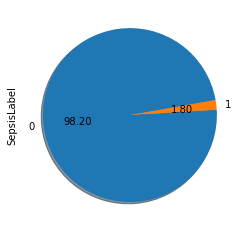

In [ ]:
original_data['SepsisLabel'].value_counts().plot(kind='pie',autopct='%.2f',shadow=True,startangle=10)

In [ ]:
original_data['SepsisLabel'].value_counts()

0    1524294
1      27916
Name: SepsisLabel, dtype: int64

In [ ]:
#MICE imputed dataset
sepsis_data=pd.read_csv("sepsis_patients_MICE.csv")

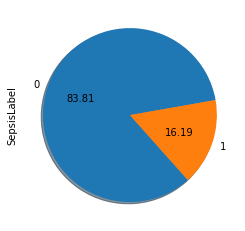

In [ ]:
sepsis_data['SepsisLabel'].value_counts().plot(kind='pie',autopct='%.2f',shadow=True,startangle=10)

In [ ]:
sepsis_data['SepsisLabel'].value_counts()

0    144494
1     27916
Name: SepsisLabel, dtype: int64

In [ ]:
sepsis_data['sepsisType'].unique()

array(['SepsisAfterAdm', 'SepsisBeforeAdm'], dtype=object)

In [ ]:
data=sepsis_data[sepsis_data['sepsisType'] == 'SepsisAfterAdm']

In [ ]:
data['sepsisType'].unique()

array(['SepsisAfterAdm'], dtype=object)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP',
       'MAP', 'DBP', 'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH',
       'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride',
       'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1',
       'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID',
       'sepsisType'],
      dtype='object')

In [ ]:
data.shape

(168764, 46)

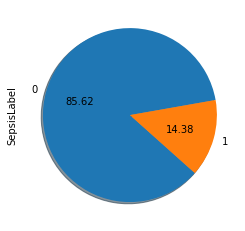

In [ ]:
data['SepsisLabel'].value_counts().plot(kind='pie',autopct='%.2f',shadow=True,startangle=10)

In [ ]:
data['SepsisLabel'].value_counts()

0    144494
1     24270
Name: SepsisLabel, dtype: int64

# Generic Function to drop columns with missing values > 60%

In [ ]:
def drop_columns(drop_df):
  drop_columns=['EtCO2','Bilirubin_direct','TroponinI','Fibrinogen','sepsisType','Unit1',
       'Unit2']
  drop_df=drop_df.drop(drop_columns,axis=1, errors='ignore')
  return drop_df


# Drop the columns with missing values > 60 % from the dataset

In [ ]:
data=drop_columns(data)

In [ ]:
data.shape

(168764, 39)

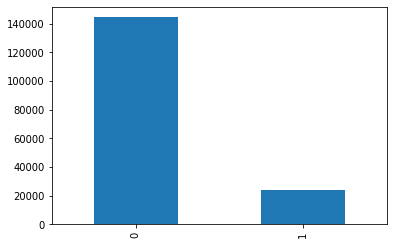

In [ ]:
data['SepsisLabel'].value_counts().plot.bar()

In [ ]:
print('Percentage of target variable in the data:')
print(data['SepsisLabel'].value_counts() / len(data) * 100)

Percentage of target variable in the data:
0    85.618971
1    14.381029
Name: SepsisLabel, dtype: float64


We will build a simple xgb classifer and compare the results for the classifier without SMOTE to with SMOTE.

In [ ]:
X = data.drop(['SepsisLabel'], axis=1) # assigning features to X, y
y = data['SepsisLabel']

In [ ]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)

In [ ]:
clf = xgb.XGBClassifier(objective='binary:logistic',n_estimator=6,seed=42)


Without SMOTE

In [ ]:
# fit the model
clf.fit(X_train, y_train.ravel())

# prediction for training dataset
train_pred = clf.predict(X_train)

# prediction for testing dataset
test_pred = clf.predict(X_test)

In [ ]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted       0   1     All
True                         
0           96806   4   96810
1           16226  35   16261
All        113032  39  113071


In [ ]:
16261/18594*100

87.45294180918576

In [ ]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted      0  1    All
True                      
0          47683  1  47684
1           8001  8   8009
All        55684  9  55693


In [ ]:
8001/8009*100

99.90011237357972

Using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [ ]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

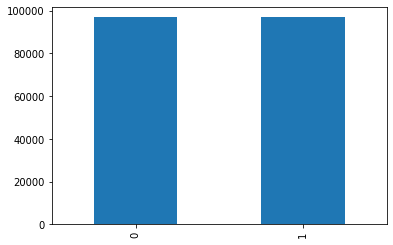

In [ ]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

In [ ]:
# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [ ]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.7530678648899907
Accuracy score for Testing Dataset =  0.7339342466737292


In [ ]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted       0      1     All
True                            
0           79018  17792   96810
1           30019  66791   96810
All        109037  84583  193620


In [ ]:
30019/96810*100

31.008160314017147

In [ ]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted      0      1    All
True                          
0          38858   8826  47684
1           5992   2017   8009
All        44850  10843  55693


In [ ]:
5992/8009*100

74.81583218878761